<a href="https://colab.research.google.com/github/MIARD/AI-CSE422/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import important libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
from sklearn.datasets import load_breast_cancer
d1 = load_breast_cancer()
d2 = pd.DataFrame(d1.data, columns = d1.feature_names)
d2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Import Dataset

In [154]:
breast_cancer = pd.read_csv("/content/sample_data/breast cancer classification dataset.csv", index_col=['id'])

#Analyzing dataset

In [155]:
print(breast_cancer.head())


         diagnosis  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
id                               ...                                      
842302           M          NaN  ...                  0.11890          NaN
842517           M        20.57  ...                      NaN          NaN
84300903         M        19.69  ...                  0.08758          NaN
84348301         M        11.42  ...                  0.17300          NaN
84358402         M        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]


In [156]:
print("Shape of dataset: ", breast_cancer.shape)
print(breast_cancer.info())
print(breast_cancer.isnull().sum())

Shape of dataset:  (569, 32)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              560 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    flo

#Dropping unimportant data

In [157]:
print(breast_cancer.shape)
breast_cancer = breast_cancer.drop(['Unnamed: 32'], axis = 1)
print(breast_cancer.shape)

(569, 32)
(569, 31)


#Drop rows that have null values(gives 0.96 accuracy)


In [158]:
print("Before removing rows:\n",breast_cancer.diagnosis.value_counts())
# breast_cancer_sub = breast_cancer[breast_cancer['radius_mean'].notnull() & breast_cancer['fractal_dimension_worst'].notnull()]
breast_cancer_sub = breast_cancer.dropna(axis=0, subset=['radius_mean', 'fractal_dimension_worst'])
print(breast_cancer_sub.shape)
print(breast_cancer_sub.isnull().sum())
print("After removing rows:\n", breast_cancer_sub.diagnosis.value_counts() )

Before removing rows:
 B    357
M    212
Name: diagnosis, dtype: int64
(552, 31)
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
After r

#SimpleImputer using strategy mean (gives 0.94 accuracy)

In [64]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy='mean')
impute.fit(breast_cancer[['radius_mean', 'fractal_dimension_worst']])
breast_cancer[['radius_mean', 'fractal_dimension_worst']] = impute.transform(breast_cancer[['radius_mean', 'fractal_dimension_worst']])
print(breast_cancer.shape)
print(breast_cancer.isnull().sum())
breast_cancer_sub = breast_cancer.copy()


(569, 31)
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


####Feature Engineering

#Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder
print(breast_cancer_sub['diagnosis'].unique())
enc = LabelEncoder()
breast_cancer_sub['diagnosis']  = enc.fit_transform(breast_cancer_sub['diagnosis'])
print(breast_cancer_sub['diagnosis'].head())

['M' 'B']
id
84300903    1
84348301    1
84358402    1
843786      1
844359      1
Name: diagnosis, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#Checking for coorelaiton

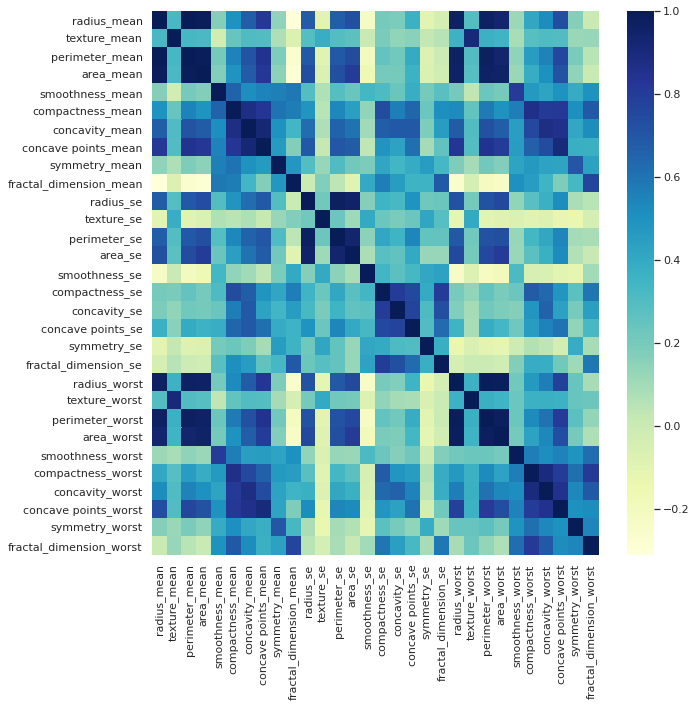

In [160]:
import seaborn as sns
bc_corr = breast_cancer_sub.iloc[:,1:].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(bc_corr, xticklabels=True,yticklabels=True, cmap='YlGnBu', ax = ax)

In [161]:

to_drop = ['texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 
           'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 
           'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
           'texture_worst', 'smoothness_worst', 'compactness_worst', 'fractal_dimension_worst']
breast_cancer_sub = breast_cancer_sub.drop(to_drop, axis = 1 )
print(breast_cancer_sub.shape)

(552, 15)


In [162]:
from sklearn.model_selection import train_test_split
x, y = breast_cancer_sub.iloc[:, 1:], breast_cancer_sub.diagnosis
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25,random_state=0, stratify=y)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train )
knn_score = knn.score(X_test, Y_test)
print("Test set accuracy: %.2f"%knn_score)

Test set accuracy: 0.96


#Logistic Regression

In [165]:
# Import the dependencies for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [166]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
logistic_score = accuracy_score(Y_pred, Y_test)
print("Test set accuracy of Logistic Regression: %.2f"%logistic_score)

Test set accuracy of Logistic Regression: 0.96


#Decisiton Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
d_tree = DecisionTreeClassifier(criterion='entropy',random_state=1)
d_tree.fit(X_train,Y_train)
Y_pred = d_tree.predict(X_test)
d_tree_score=accuracy_score(Y_pred, Y_test)
print("Test set accuracy of decision Tree: %.2f"%d_tree_score)

Test set accuracy of decision Tree: 0.95


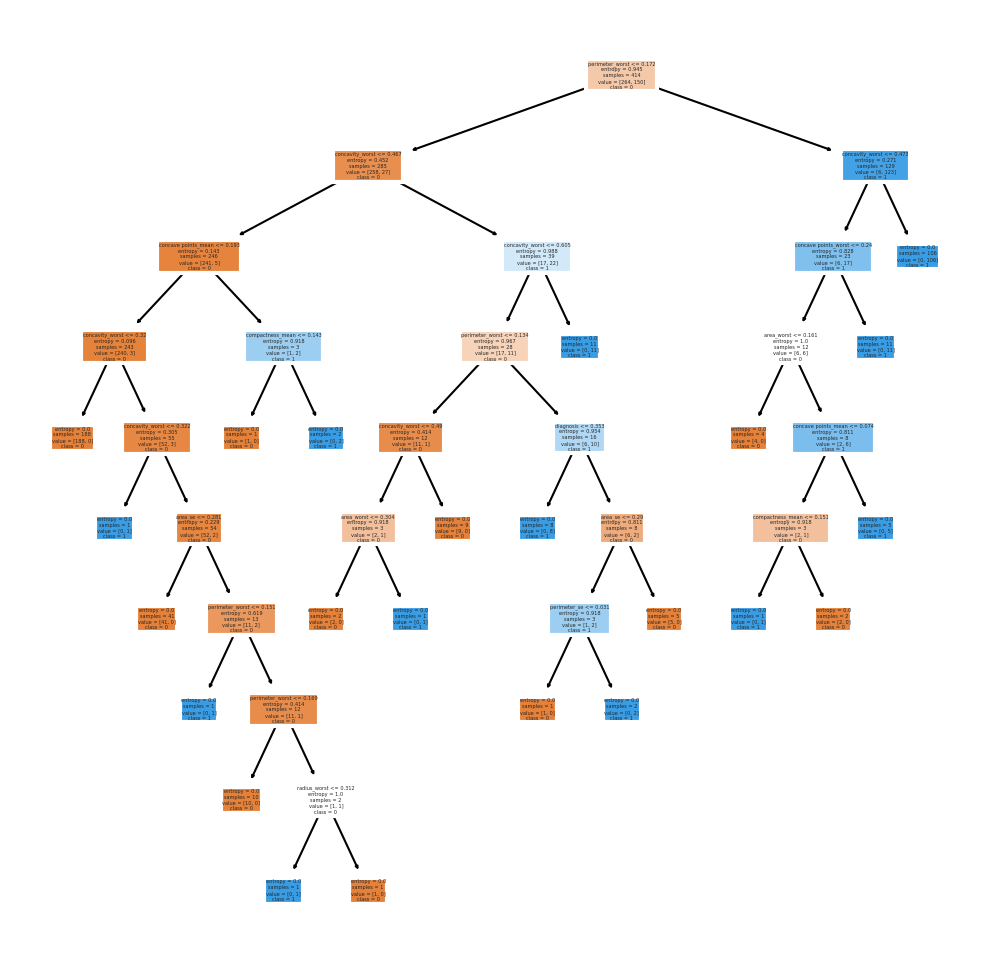

In [179]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree_axe = tree.plot_tree(d_tree, feature_names = breast_cancer_sub.columns, 
               class_names=['0', '1'],
               filled = True);
for o in tree_axe:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(0.5) 


# Accuracy bar chart

Text(0, 0.5, 'Accuracy')

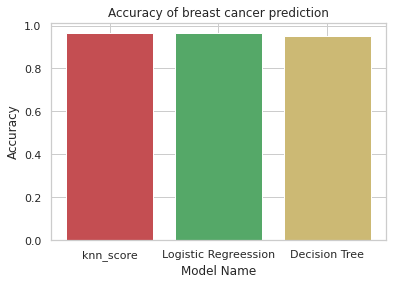

In [172]:
fig, axes = plt.subplots()
models = ["knn_score", "Logistic Regreession", "Decision Tree"]
accuracy = [knn_score,logistic_score, d_tree_score]
pt = axes.bar(models, accuracy, color=['r', 'g', 'y'], )
# import seaborn as sns
# X = ["Logistic Regreession", "Decision Tree"]
# Y = [logistic_score, d_tree_score]
# sns.set_theme(style="whitegrid")
# axes = sns.barplot(x=X, y=Y, linewidth=0.25)
axes.set_title("Accuracy of breast cancer prediction")
axes.set_xlabel("Model Name")
axes.set_ylabel("Accuracy")
# axes.legend((pt[0], pt[1]), (X[0], X[1]))